In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

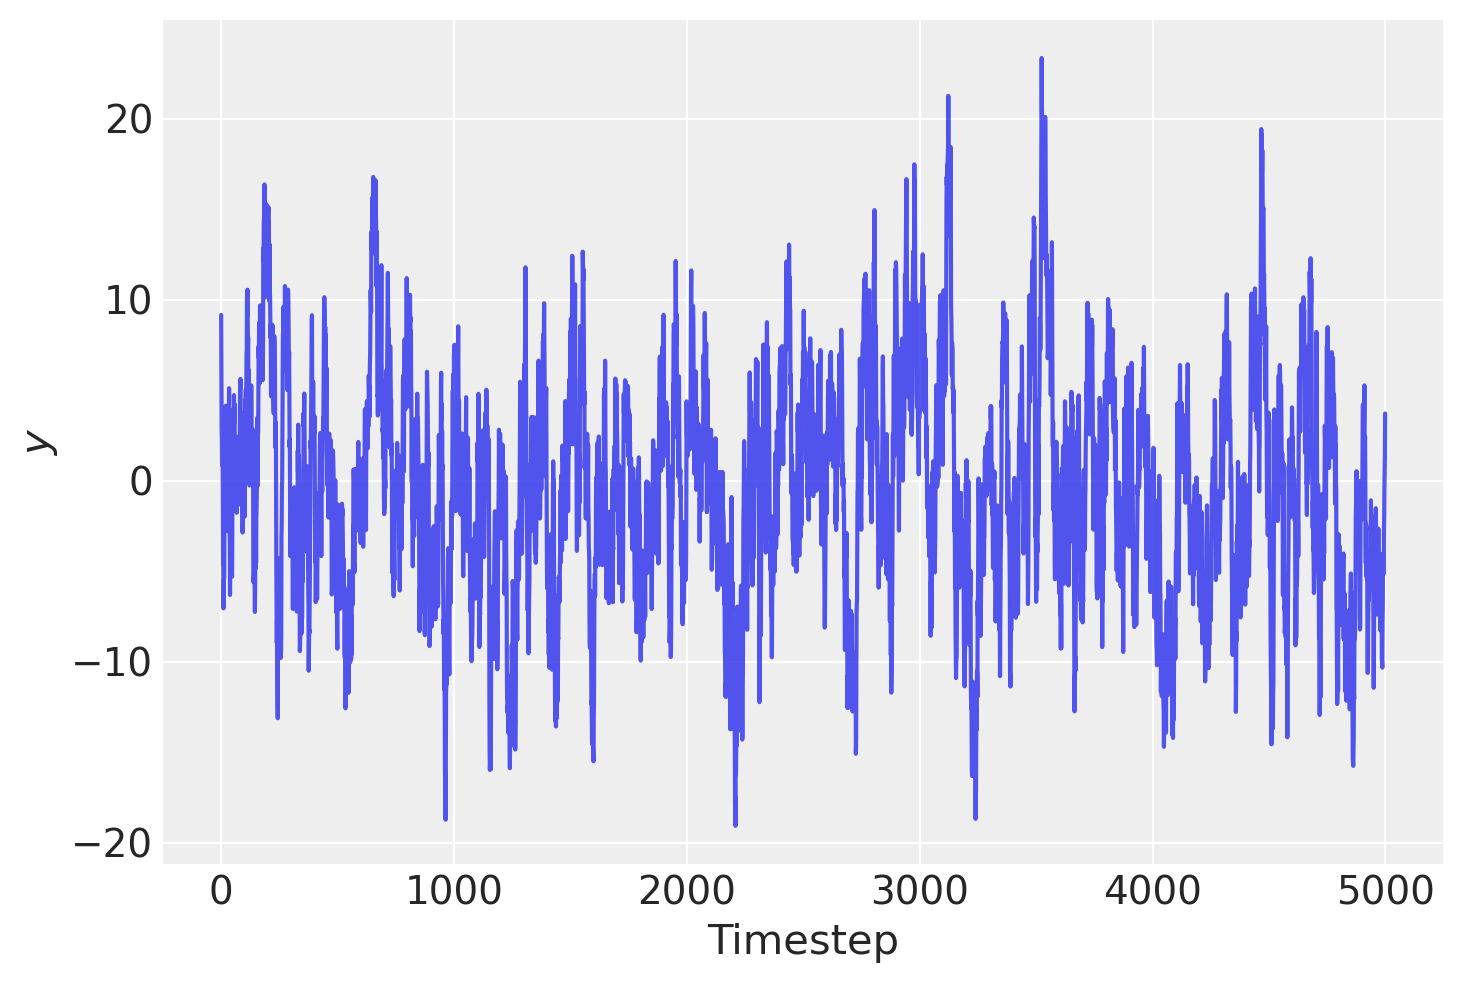

In [3]:
T = 10000
y = np.zeros((T,))

# true stationarity:
true_theta = 0.95
# true standard deviation of the innovation:
true_sigma = 2.0
# true process mean:
true_center = 0.0

for t in range(1, T):
    y[t] = true_theta * y[t - 1] + np.random.normal(loc=true_center, scale=true_sigma)

y = y[-5000:]
plt.plot(y, alpha=0.8)
plt.xlabel("Timestep")
plt.ylabel("$y$");

In [4]:
with pm.Model() as ar1:
    # assumes 95% of prob mass is between -2 and 2
    theta = pm.Normal("theta", 0.0, 1.0)
    # precision of the innovation term
    tau = pm.Exponential("tau", 0.5)
    # process mean
    center = pm.Normal("center", mu=0.0, sigma=1.0)

    likelihood = pm.AR1("y", k=theta, tau_e=tau, observed=y - center)

    trace = pm.sample(1000, tune=2000, init="advi+adapt_diag", random_seed=RANDOM_SEED)
    idata = az.from_pymc3(trace)

<ipython-input-4-2e42c128ea15>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune=2000, init="advi+adapt_diag", random_seed=RANDOM_SEED)
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 13500
Interrupted at 13,499 [6%]: Average Loss = 42,118


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'theta': 1.0399476222897253, 'tau_log__': -1.6621215910056972, 'center': -0.19630657895855808, 'tau': 0.18973601057092268}

Initial evaluation results:
theta       -1.46
tau_log__   -2.45
center      -0.94
y            -inf
Name: Log-probability of test_point, dtype: float64

In [5]:
pm.__version__

'3.11.2'

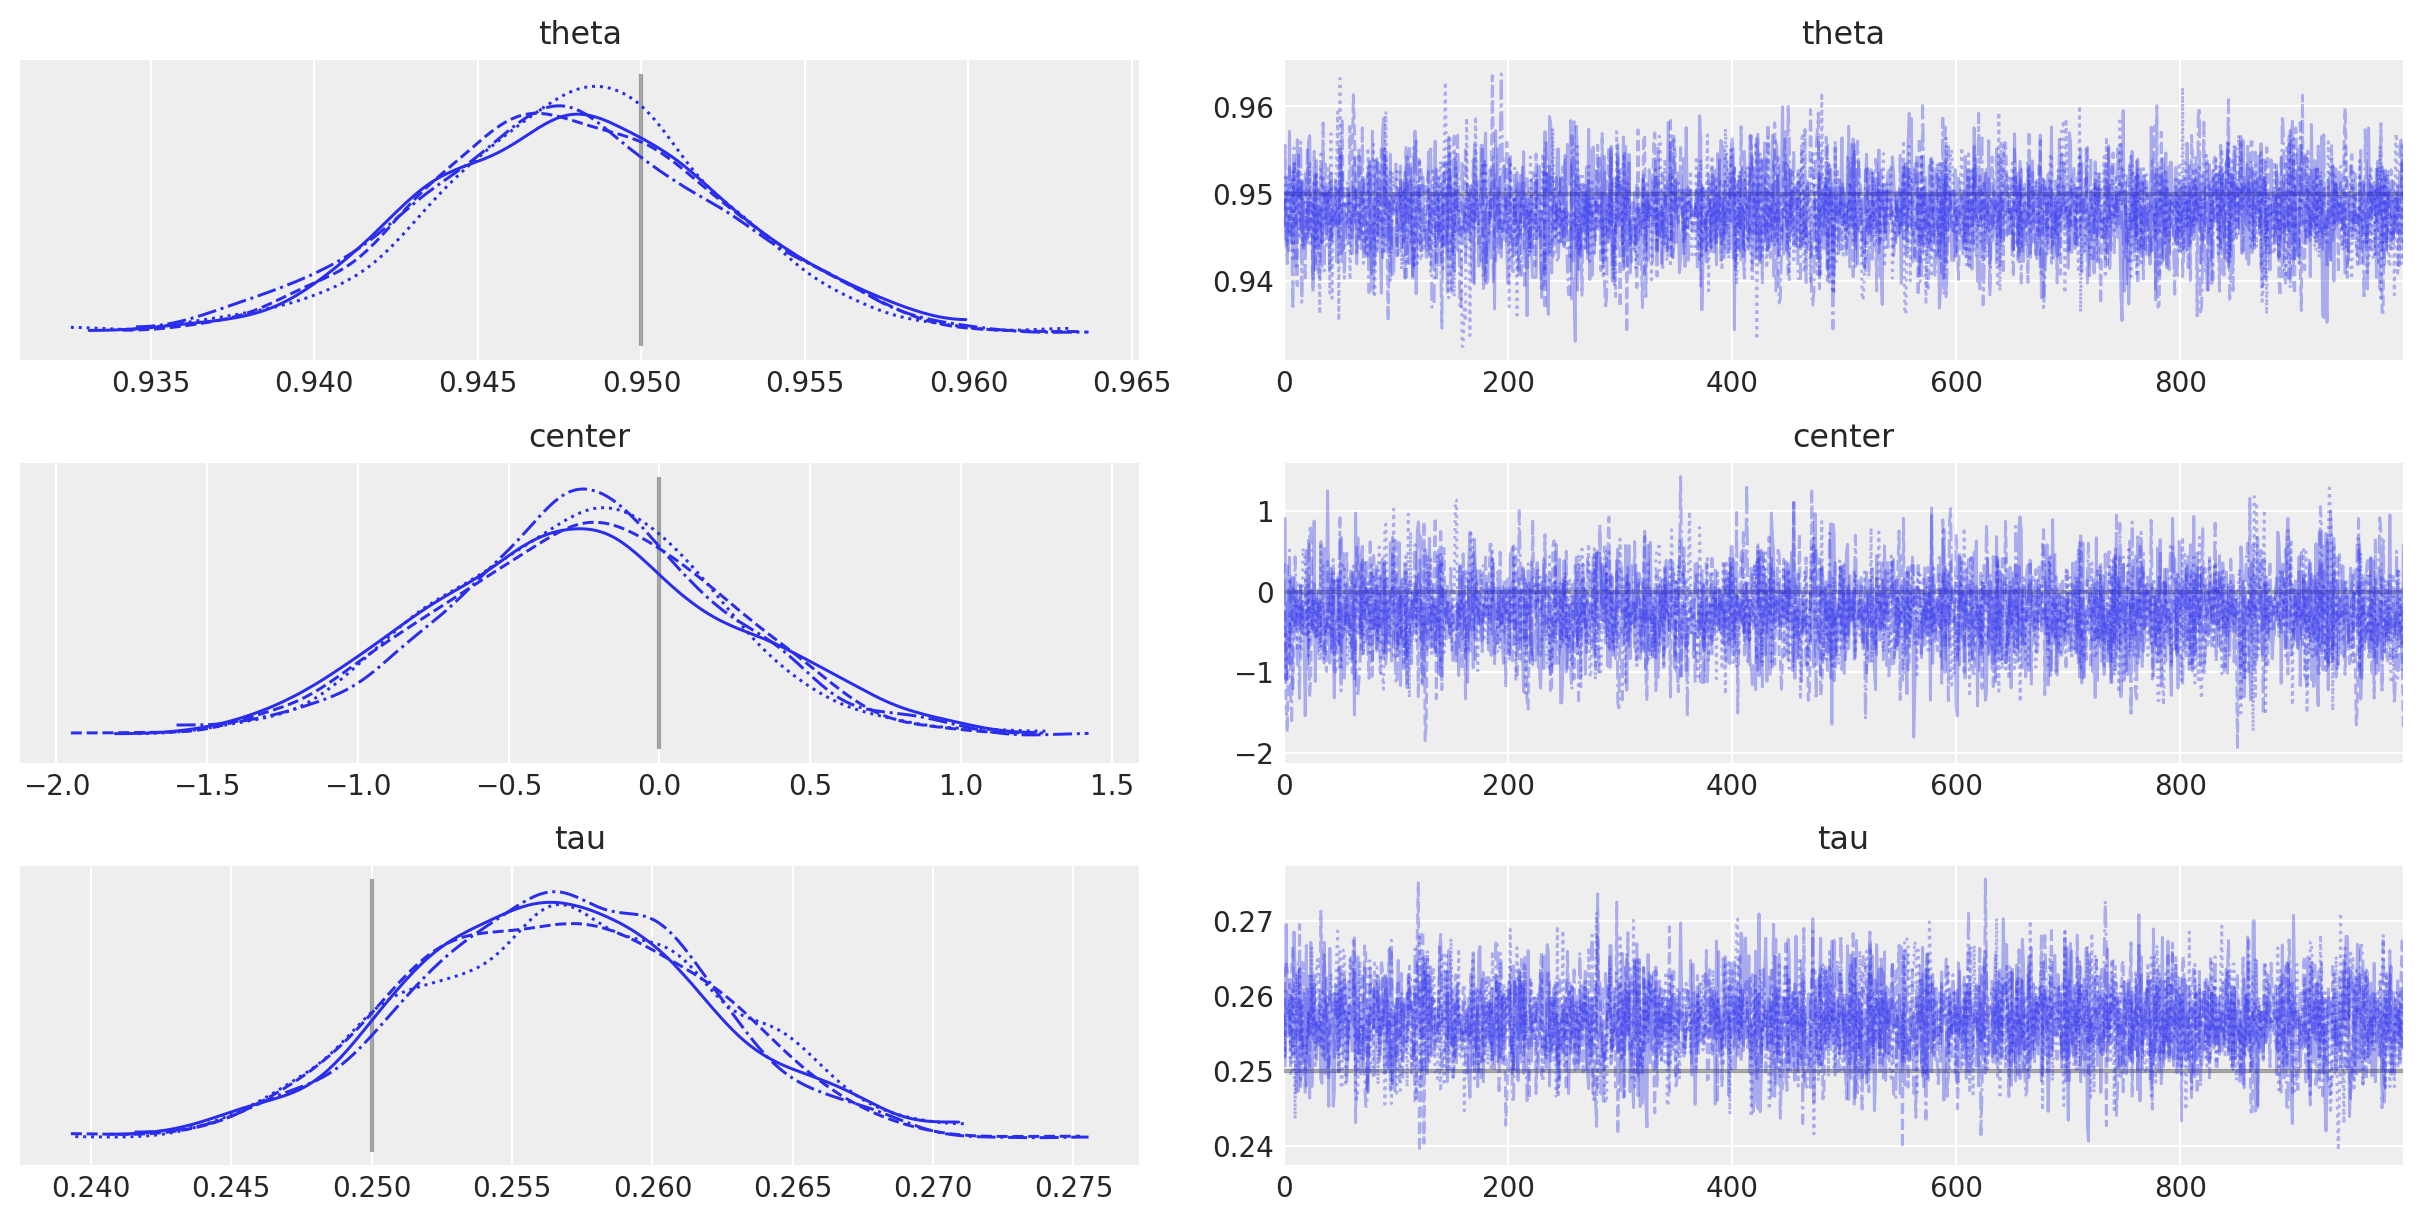

In [6]:
az.plot_trace(
    idata,
    lines=[
        ("theta", {}, true_theta),
        ("tau", {}, true_sigma ** -2),
        ("center", {}, true_center),
    ],
);